In [2]:
import pandas as pd

clusters = pd.read_csv('results/cluster_terms.csv')
ids = pd.read_csv('results/id_to_cluster.csv')
movies = pd.read_csv('results/ratings.csv')

In [3]:
def cluster_id_mapper(id):
  try:
    id_record = ids[ids['id'] == id]
    if not id_record.empty:
        return id_record['cluster'].iloc[0]
    return None
  except Exception as e:
    print(f"Error processing id_record {id}: {str(e)}")
    return None

movies['cluster_id'] = movies['id'].apply(lambda id: cluster_id_mapper(id))
movies.head(5)

,id,title,type,genres,imdb_rating,numVotes,releaseYear,filmweb_rating,douban_rating,cluster_id
0,tt0111161,The Shawshank Redemption,movie,Drama,9.3,2991460.0,1994.0,8.8,9.5,11
1,tt0468569,The Dark Knight,movie,"Action, Crime, Drama",9.0,2971515.0,2008.0,8.0,8.6,3
2,tt0137523,Fight Club,movie,Drama,8.8,2418682.0,1999.0,8.3,9.1,5
3,tt0109830,Forrest Gump,movie,"Drama, Romance",8.8,2340761.0,1994.0,8.5,9.3,3
4,tt0110912,Pulp Fiction,movie,"Crime, Drama",8.9,2295044.0,1994.0,8.3,8.8,7


In [5]:
def mean_cluster_score(id, source):
  try:
    cluster_movies = movies[movies['cluster_id'] == id]
    if not cluster_movies.empty:
        return cluster_movies[source].mean()
    return None
  except Exception as e:
    print(f"Error processing id_record {id}: {str(e)}")
    return None

clusters['filmweb'] = clusters['Id'].apply(lambda id: mean_cluster_score(id, 'filmweb_rating'))
clusters['imdb'] = clusters['Id'].apply(lambda id: mean_cluster_score(id, 'imdb_rating'))
clusters['douban'] = clusters['Id'].apply(lambda id: mean_cluster_score(id, 'douban_rating'))

clusters

,Id,Name,Top Terms,filmweb,imdb,douban
0,0,Cluster 0,"john, discovers, mysterious, future, life, pas...",7.060000,7.220000,7.260000
1,1,Cluster 1,"agent, finds, dangerous, powerful, american, e...",7.224000,7.300000,7.698000
2,2,Cluster 2,"new, school, life, tries, past, crew, goes, wo...",6.843478,7.195652,7.143478
3,3,Cluster 3,"man, life, young, war, world, love, friends, f...",7.117113,7.367835,7.609897
4,4,Cluster 4,"home, child, old, world, return, earth, war, t...",6.846667,7.353333,7.156667
5,5,Cluster 5,"fight, world, war, evil, years, team, death, a...",7.306667,7.473333,7.363333
6,6,Cluster 6,"killer, real, life, teenager, help, friends, o...",7.160000,7.566667,7.620000
7,7,Cluster 7,"wife, life, girl, man, relationship, discovers...",7.288235,7.394118,7.694118
8,8,Cluster 8,"york, new york, new, york city, new york city,...",6.952000,7.224000,7.544000
9,9,Cluster 9,"family, discover, sets, boy, story, man, fathe...",7.287879,7.472727,7.736364


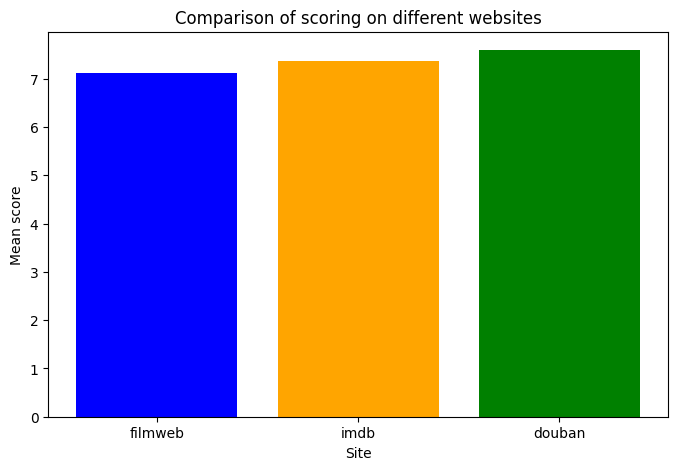

In [6]:
import matplotlib.pyplot as plt

labels = ['filmweb', 'imdb', 'douban']
values = [movies['filmweb_rating'].mean(), movies['imdb_rating'].mean(), movies['douban_rating'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange', 'green'])

plt.title('Comparison of scoring on different websites')
plt.xlabel('Site')
plt.ylabel('Mean score')

plt.show()

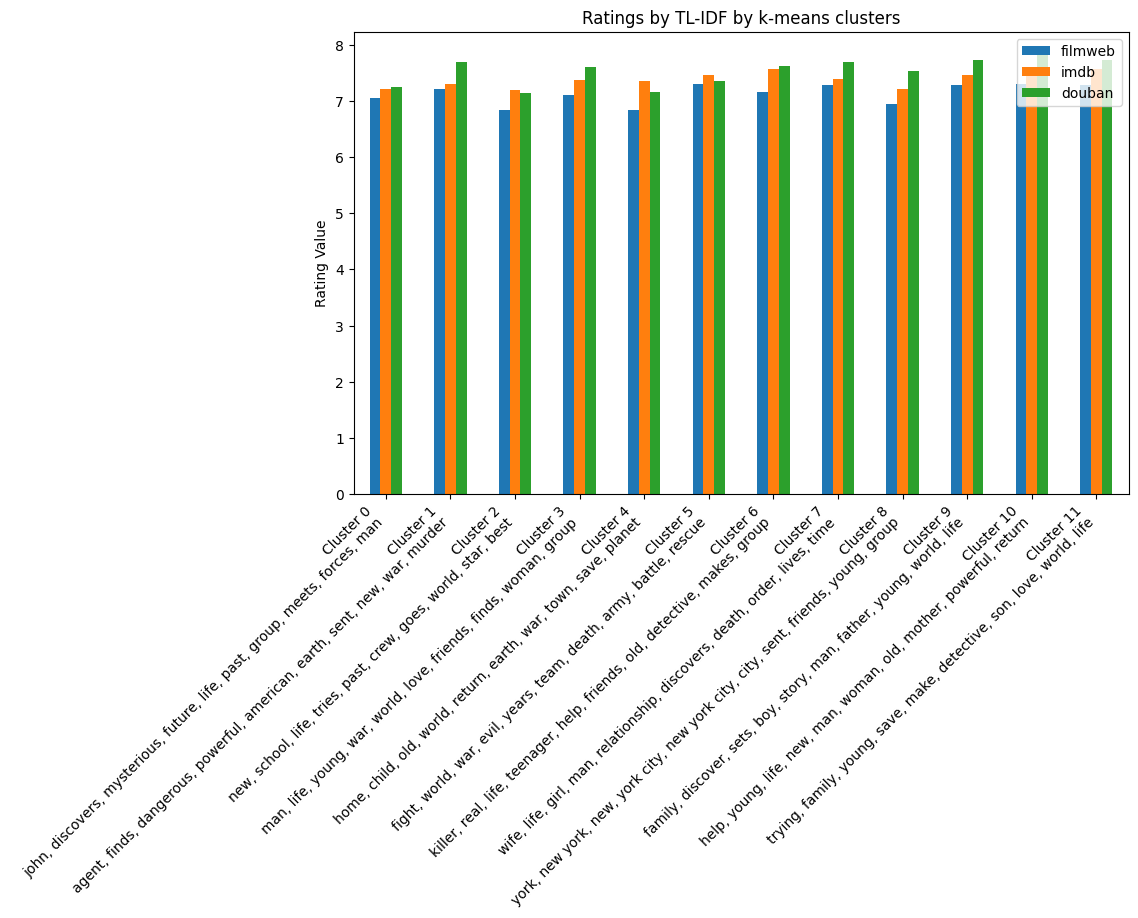

In [ ]:
combined_labels = [f'{name}\n{label}' for name, label in zip(clusters['Name'], clusters['Top Terms'])]

ax = clusters[['filmweb', 'imdb', 'douban']].plot(kind='bar', figsize=(10, 6))
ax.set_xticks(range(len(combined_labels)))
ax.set_xticklabels(combined_labels, rotation=45, ha="right")
plt.title('Ratings by TL-IDF by k-means clusters')
plt.ylabel('Rating Value')
plt.show()